In [7]:
import pandas as pd
from pandas import Series, DataFrame

In [4]:
train_df = pd.read_csv('./input/train.csv')
test_df = pd.read_csv('./input/test.csv')

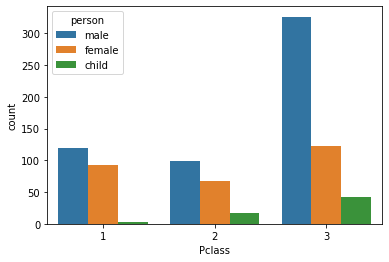

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def male_female_child(passenger):
    age, sex = passenger
    if age < 10:
        return 'child'
    else:
        return sex

train_df['person'] = train_df[['Age','Sex']].apply(male_female_child, axis=1)

sns.countplot('Pclass', data=train_df, hue='person')

In [14]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male


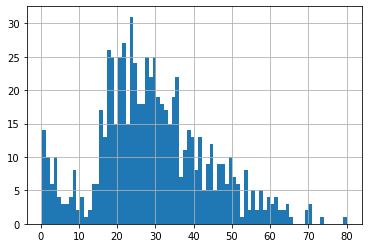

In [18]:
train_df['Age'].hist(bins = 80)

In [19]:
train_df['Age'].mean()

29.69911764705882

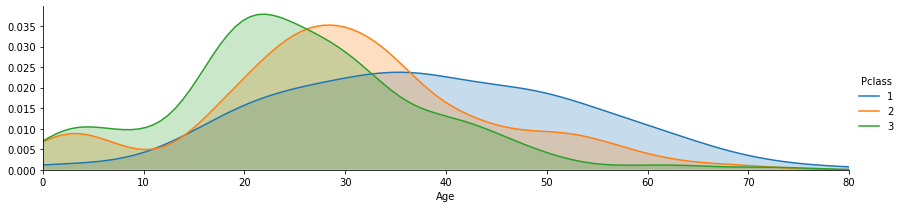

In [23]:
fig = sns.FacetGrid(train_df, hue='Pclass', aspect=4)
fig.map(sns.kdeplot, 'Age', shade = True)
oldest = train_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

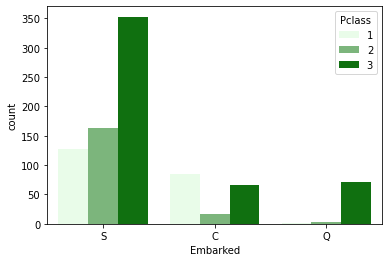

In [24]:
sns.countplot('Embarked', data=train_df, hue='Pclass', color='g')

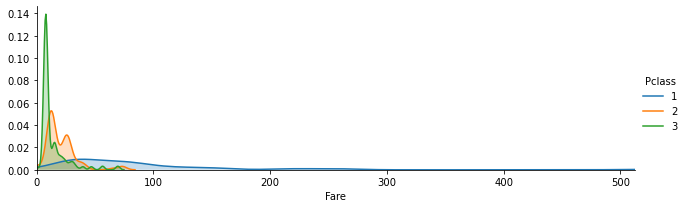

In [30]:
fig = sns.FacetGrid(train_df, hue='Pclass', aspect=3)

fig.map(sns.kdeplot, 'Fare', shade=True)
highest = train_df['Fare'].max()

fig.set(xlim=(0,highest))
fig.add_legend()

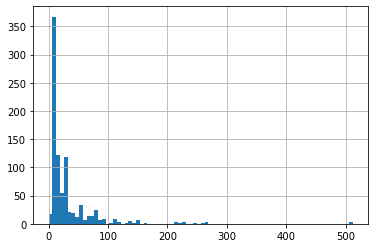

In [31]:
train_df['Fare'].hist(bins=80)

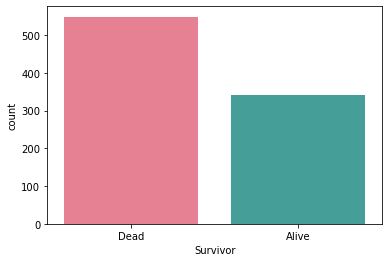

In [32]:
train_df['Survivor'] = train_df.Survived.map({0:'Dead', 1:'Alive'})
sns.countplot('Survivor', data=train_df, palette='husl')

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


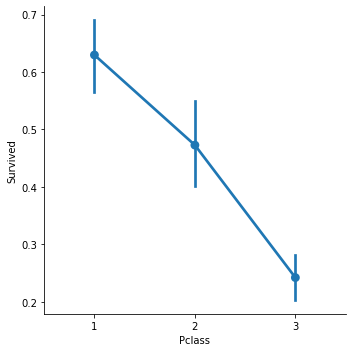

In [36]:
sns.factorplot('Pclass', 'Survived', data=train_df)

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


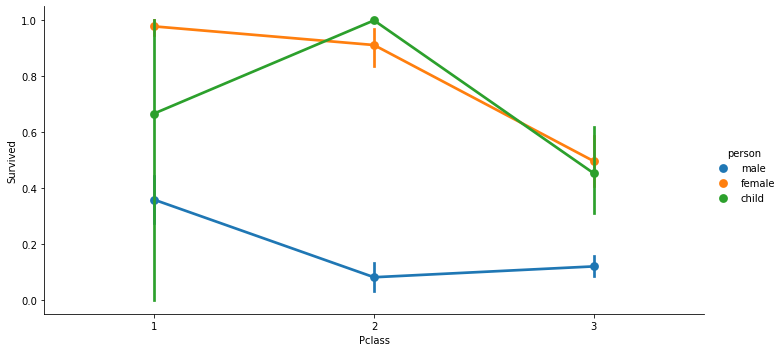

In [39]:
sns.factorplot('Pclass', 'Survived', hue='person', data=train_df, aspect=2)

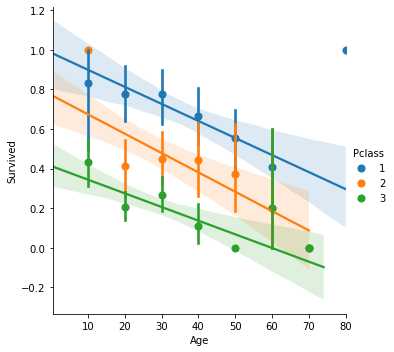

In [40]:
generations= [10,20,30,40,50,60,70,80]
sns.lmplot('Age','Survived', hue='Pclass', data=train_df, hue_order=[1,2,3], x_bins=generations)